In [41]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram
import pandas as pd
import yfinance as yf

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from torchvision import models
import torch.nn.functional as F
import numpy as np
from sklearn.metrics import accuracy_score

In [42]:
folder_path = 'data/new_label_dataset/'

In [43]:
start_date = "2017-01-01"
end_date = "2022-12-31"

In [44]:
stock_symbol = 'AUBANK.NS'

In [45]:
aubank_data = pd.read_csv(f'{folder_path}/{stock_symbol}.csv')

In [46]:
aubank_data.shape

(1322, 30)

In [47]:
aubank_data.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,SMA_9,SMA_21,EMA_9,...,BB_lower,ADX,ADX+DI,ADX-DI,CMF,OBV,CCI,Williams_%R,ATR,Target
0,2017-08-29,265.500000,279.399994,265.500000,272.399994,270.861786,1649802,268.661109,275.953571,269.747170,...,257.109623,46.315878,15.579860,27.511465,0.182936,-7916212.0,-22.486667,-43.905643,11.294367,0.00
1,2017-08-30,275.000000,278.875000,274.225006,275.424988,273.869659,712294,269.036109,275.057142,270.882733,...,258.701281,44.629755,14.862239,26.244265,0.162639,-7203918.0,24.239067,-22.460356,10.919995,0.53
2,2017-08-31,274.899994,278.225006,273.000000,274.725006,273.173615,580208,269.366665,274.077381,271.651188,...,260.456179,43.268357,14.290231,26.136532,0.141817,-7784126.0,30.892280,-16.461228,10.480352,0.50
3,2017-09-01,275.500000,285.000000,273.774994,276.149994,274.590576,1765988,270.174998,273.277380,272.550949,...,262.568087,40.724434,18.056729,23.999530,0.124248,-6018138.0,96.957914,-36.875025,10.537509,0.51
4,2017-09-04,277.875000,282.149994,271.024994,278.500000,276.927307,1182770,271.108331,272.682142,273.740759,...,262.630387,38.798966,16.607432,24.057285,0.144057,-4835368.0,88.353220,-27.083333,10.582363,0.52
5,2017-09-05,280.049988,288.250000,276.575012,286.575012,284.956726,1989224,273.533332,273.030952,276.307610,...,261.445038,36.017884,19.571585,22.056518,0.186246,-2846144.0,177.568397,-6.146744,10.665375,0.57
6,2017-09-06,284.000000,289.000000,281.799988,283.924988,282.321686,1157354,275.899997,273.353571,277.831085,...,260.914892,33.384987,19.092384,20.902004,0.166896,-4003498.0,160.379632,-18.125044,10.403286,0.48
7,2017-09-07,285.625000,288.000000,277.500000,279.350006,277.772491,815452,277.336110,273.527380,278.134870,...,261.370567,31.613485,17.642099,22.425050,0.090621,-4818950.0,117.262176,-34.464264,10.410570,0.47
8,2017-09-08,280.500000,282.750000,275.000000,277.174988,275.609802,831916,278.247220,273.194047,277.942893,...,261.367084,30.339722,16.637531,22.984957,0.036877,-5650866.0,67.870040,-42.232186,10.210966,0.49
9,2017-09-11,279.375000,282.450012,275.500000,279.299988,277.722839,697004,279.013885,273.401188,278.214312,...,261.489833,29.181880,15.770295,21.786860,0.068276,-4953862.0,69.590690,-34.642901,9.967196,0.52


In [48]:
sample_data = aubank_data['Close'].values
print(len(sample_data))

1322


In [49]:
reduced_data = sample_data[:30]

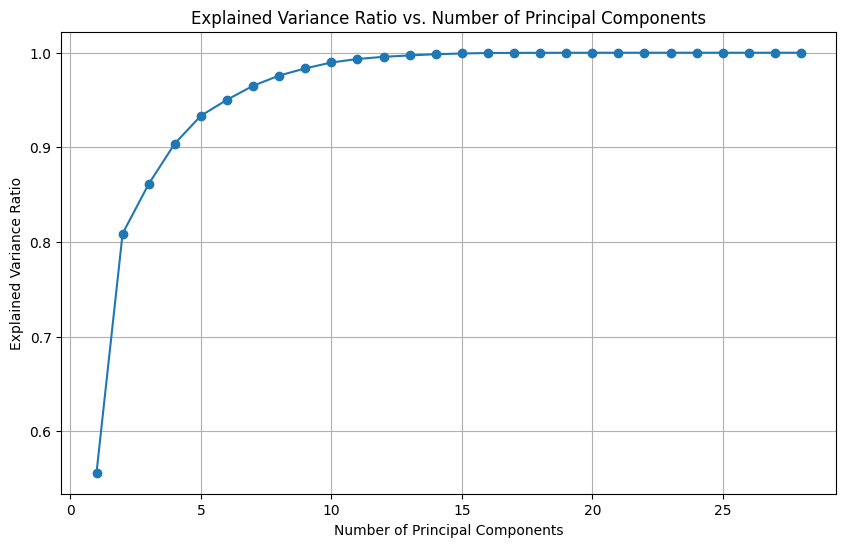

          PC 1      PC 2      PC 3      PC 4      PC 5      PC 6      PC 7  \
0    -4.761518  0.705379  0.989621  1.359001 -0.305807 -0.465252  0.390279   
1    -4.694228 -0.083276  1.162377  0.803311 -0.829710 -0.323020  0.587892   
2    -4.684926 -0.433214  1.281650  0.487922 -0.951935 -0.198866  1.024008   
3    -4.525571 -0.787203  1.380134  0.382077 -0.251228 -0.098943  0.711269   
4    -4.511782 -0.996872  1.247951  0.219934 -0.488568 -0.243139  0.885079   
...        ...       ...       ...       ...       ...       ...       ...   
1317  6.026426  1.666605 -1.695933  0.104410 -0.866054  0.205457 -0.169348   
1318  6.158789  1.443082 -1.609573 -0.137105 -0.763912  0.140249 -0.563147   
1319  6.165389  1.189305 -1.633271 -0.373952 -0.999439 -0.025968 -0.429824   
1320  6.334288  0.900088 -1.094988 -0.529822 -0.072367  0.112278 -0.083472   
1321  6.134773  1.499525 -1.619684 -0.470815 -0.722066 -0.198355  0.216221   

          PC 8      PC 9     PC 10     PC 11     PC 12     PC 1

In [50]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

# Selecting the features for PCA
features = aubank_data.drop(columns=['Date', 'Target'])

# Standardizing the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Hyperparameter testing for the number of principal components
explained_variance_ratios = []
num_features = range(1, len(features.columns) + 1)

for n in num_features:
    pca = PCA(n_components=n)
    pca.fit(scaled_features)
    explained_variance_ratios.append(sum(pca.explained_variance_ratio_))

# Plotting the explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(num_features, explained_variance_ratios, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio vs. Number of Principal Components')
plt.grid(True)
plt.show()

# Performing PCA with the optimal number of components (you can choose based on the plot)
optimal_components = 13  # Change this based on the plot
pca = PCA(n_components=optimal_components)
principal_components = pca.fit_transform(scaled_features)

# Creating a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=[f'PC {i+1}' for i in range(optimal_components)])

# Adding the date and target columns to the PCA DataFrame
pca_df['Date'] = aubank_data['Date']
pca_df['Target'] = aubank_data['Target']

print(pca_df)

In [51]:
pca_df.head()

,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8,PC 9,PC 10,PC 11,PC 12,PC 13,Date,Target
0,-4.761518,0.705379,0.989621,1.359001,-0.305807,-0.465252,0.390279,0.834717,-0.367757,0.743379,0.079532,0.059056,-0.103470,2017-08-29,0.00
1,-4.694228,-0.083276,1.162377,0.803311,-0.829710,-0.323020,0.587892,0.787388,-0.010206,0.961482,0.045206,-0.017042,-0.068746,2017-08-30,0.53
2,-4.684926,-0.433214,1.281650,0.487922,-0.951935,-0.198866,1.024008,0.658220,-0.055787,0.891507,0.013281,-0.027874,-0.036422,2017-08-31,0.50
3,-4.525571,-0.787203,1.380134,0.382077,-0.251228,-0.098943,0.711269,0.525808,-0.468123,0.170234,0.538297,0.026149,0.003017,2017-09-01,0.51
4,-4.511782,-0.996872,1.247951,0.219934,-0.488568,-0.243139,0.885079,0.491716,-0.241914,0.346426,0.376298,-0.015686,0.054790,2017-09-04,0.52


In [57]:
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import mean_squared_error
import torch.nn as nn
import torch.optim as optim

# Prepare the data
X = pca_df.drop(columns=['Date', 'Target']).values
y = pca_df['Target'].values

# Use the original DataFrame's index to track the row indices
X_train, X_test, y_train, y_test, train_indices, test_indices = train_test_split(
    X, y, pca_df.index, test_size=0.2, random_state=42)

# Convert the data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# Create DataLoader for training and testing sets
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Define the LSTM model
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

# Initialize the model, loss function, and optimizer
input_size = X_train.shape[1]
hidden_size = 50
num_layers = 2
output_size = 1

model = LSTMModel(input_size, hidden_size, num_layers, output_size)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
num_epochs = 50
for epoch in range(num_epochs):
    model.train()
    for X_batch, y_batch in train_loader:
        X_batch = X_batch.unsqueeze(1)  # Add sequence dimension
        y_batch = y_batch.unsqueeze(1)
        
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the model
model.eval()
with torch.no_grad():
    y_pred = []
    y_true = []
    for X_batch, y_batch in test_loader:
        X_batch = X_batch.unsqueeze(1)  # Add sequence dimension
        outputs = model(X_batch)
        y_pred.extend(outputs.squeeze().tolist())
        y_true.extend(y_batch.tolist())

# Calculate accuracy or other metrics as needed
mse = mean_squared_error(y_true, y_pred)
print(f'Mean Squared Error: {mse:.4f}')




Epoch [1/50], Loss: 0.1446
Epoch [2/50], Loss: 0.0079
Epoch [3/50], Loss: 0.0014
Epoch [4/50], Loss: 0.0001
Epoch [5/50], Loss: 0.0021
Epoch [6/50], Loss: 0.0024
Epoch [7/50], Loss: 0.0001
Epoch [8/50], Loss: 0.0071
Epoch [9/50], Loss: 0.0097
Epoch [10/50], Loss: 0.0002
Epoch [11/50], Loss: 0.0001
Epoch [12/50], Loss: 0.0003
Epoch [13/50], Loss: 0.0079
Epoch [14/50], Loss: 0.0001
Epoch [15/50], Loss: 0.0010
Epoch [16/50], Loss: 0.0014
Epoch [17/50], Loss: 0.0109
Epoch [18/50], Loss: 0.0003
Epoch [19/50], Loss: 0.0007
Epoch [20/50], Loss: 0.0036
Epoch [21/50], Loss: 0.0012
Epoch [22/50], Loss: 0.0000
Epoch [23/50], Loss: 0.0036
Epoch [24/50], Loss: 0.0015
Epoch [25/50], Loss: 0.0071
Epoch [26/50], Loss: 0.0007
Epoch [27/50], Loss: 0.0014
Epoch [28/50], Loss: 0.0018
Epoch [29/50], Loss: 0.0080
Epoch [30/50], Loss: 0.0046
Epoch [31/50], Loss: 0.0012
Epoch [32/50], Loss: 0.0059
Epoch [33/50], Loss: 0.0005
Epoch [34/50], Loss: 0.0042
Epoch [35/50], Loss: 0.0117
Epoch [36/50], Loss: 0.0000
E

In [59]:
from sklearn.metrics import mean_absolute_error

# Calculate MAE
mae = mean_absolute_error(y_true, y_pred)
print(f'Mean Absolute Error: {mae:.4f}')

Mean Absolute Error: 0.0355


In [58]:
# Extract the dates corresponding to the test set using the test_indices
test_dates = pca_df.loc[test_indices, 'Date'].values

# Print the date, predicted, and actual values
for date, pred, actual in zip(test_dates, y_pred, y_true):
    print(f"Date: {date}, Predicted: {pred:.4f}, Actual: {actual:.4f}")

Date: 2020-08-12, Predicted: 0.5807, Actual: 0.6100
Date: 2019-08-07, Predicted: 0.5217, Actual: 0.5200
Date: 2018-08-13, Predicted: 0.5187, Actual: 0.4900
Date: 2019-05-17, Predicted: 0.5010, Actual: 0.5800
Date: 2017-11-08, Predicted: 0.5010, Actual: 0.5000
Date: 2018-10-31, Predicted: 0.5198, Actual: 0.5400
Date: 2021-03-10, Predicted: 0.5013, Actual: 0.5900
Date: 2021-09-07, Predicted: 0.4875, Actual: 0.4900
Date: 2019-12-19, Predicted: 0.5190, Actual: 0.5000
Date: 2019-11-25, Predicted: 0.5489, Actual: 0.6000
Date: 2020-03-12, Predicted: 0.3074, Actual: 0.2400
Date: 2020-02-27, Predicted: 0.5946, Actual: 0.5000
Date: 2021-03-31, Predicted: 0.5139, Actual: 0.2800
Date: 2019-01-25, Predicted: 0.5004, Actual: 0.5100
Date: 2019-05-06, Predicted: 0.4664, Actual: 0.4800
Date: 2021-12-21, Predicted: 0.4400, Actual: 0.6500
Date: 2018-12-07, Predicted: 0.4790, Actual: 0.4900
Date: 2022-08-10, Predicted: 0.4873, Actual: 0.4700
Date: 2019-05-22, Predicted: 0.4980, Actual: 0.4700
Date: 2020-1